This notebook demonstrates how to use an arbitrary clustering algorithm which as been implemented in Python

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from what_the_cluster.GapStat import GapStat

%matplotlib inline

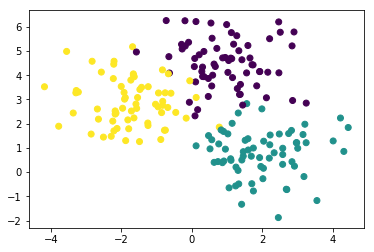

In [2]:
# sample some toy data with 3 clusters
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

# custom `clusterer` functions

`GapStat`'s `clusterer` argument let's you pass in a function. The `clusterer()` function should take two arguments (X, n_clusters) where X is the dataset to cluster and n_clusters is the desired number of clusters to find. `clusterer()` should out put the estimated cluster labels for each data point as a list.

This is how the user can implement an arbitrary clustering algorithm!

Here is a simple example which implements K-Means

In [3]:
# clusterer() takes two arguments
def clusterer(X, n_clusters):
    """
    Calls sklearn's K-Mean's function. 
    
    Parameters
    ----------
    X (matrix): the dataset to cluster
    n_clus
    """
    clusterer = KMeans(n_clusters=n_clusters)
    
    # return a list of estimated clusters for each data points
    return clusterer.fit_predict(X)


clusterer(X, 4)

NameError: name 'KMeans' is not defined

We can now pass `clusterer` into `GapStat`. Note this function will be applied to the observed dataset, X, and the sampled reference datasets.

In [ ]:
gs = GapStat(clusterer=clusterer)  # clusterer can be a function!
gs.estimate_n_clusters(X)
gs.est_n_clusters

# creating `clusterer` with a higher order function


Suppose you want to use a someone's clustering algorithm but also pass in custom parameters. We can use *higher order functions* (see below for additional details) to get a `clusterer()` function.

In [ ]:
def get_km_clusterer(**kwargs):
    """
    Returns a clusterer() function which implements  sklearn's K-Means algorithm.
    **kwargs can be any of the key word arguments for KMeans(). See the documentation
    http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    """
    def clusterer(X, n_clusters):
        clusterer = KMeans(n_clusters=n_clusters, **kwargs)
        return clusterer.fit_predict(X)
    
    return clusterer

In [ ]:
clusterer = get_km_clusterer(init='random',
                             n_init=20,
                             max_iter=100,
                             random_state=43,
                             n_jobs=-1,
                             algorithm='elkan')


clusterer(X, 3)

In [ ]:
gs = GapStat(clusterer=clusterer)  # clusterer can be a function!
gs.estimate_n_clusters(X)
gs.est_n_clusters

We could alternatively have used `functools.partial`.

In [ ]:
from functools import partial

def km_fun(X, n_clusters, **kwargs):
    clusterer = KMeans(n_clusters=n_clusters, **kwargs)
    return clusterer.fit_predict(X)


clusterer = partial(km_fun, n_init=20, max_iter=100)

In [ ]:
gs = GapStat(clusterer=clusterer)  # clusterer can be a function!
gs.estimate_n_clusters(X)
gs.est_n_clusters

# simple example of high-order functions


Python let's you write functions wich return functions (and use a function as an argument to another function). For a review of higher-order functions see, for example,
- http://composingprograms.com/pages/16-higher-order-functions.html
- https://docs.python.org/3.1/howto/functional.html


In [ ]:
def power(exponent):
    def f(x):
        return x ** exponent
    
    return f
    
square = power(2)
cube = power(3)

print(square(2))
print(cube(2))

In [ ]:
# or using partial

# borrowing this example from https://www.pydanny.com/python-partials-are-fun.html
def power(base, exponent):
    return base ** exponent

p_square = partial(power, exponent=2)
p_cube = partial(power, exponent=3)

print(p_square(2))
print(p_cube(2))